# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [ ]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [ ]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

In [ ]:
myimshow(zebra)

In [ ]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

In [ ]:
g=genGabor((256,256), 0.3, np.pi/4, func=np.cos)


In [ ]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
res = convolve2d(zebra, g) 
plt.imshow(res)

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

In [ ]:
theta = np.arange(0, np.pi, np.pi/4) # range of theta
omega = np.arange(0.2, 0.6, 0.1) # range of omega
params = [(t,o) for o in omega for t in theta]
sinFilterBank = []
cosFilterBank = []
gaborParams = []
for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(128, 128)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

Wall time: 1min 18s


<Figure size 432x288 with 0 Axes>

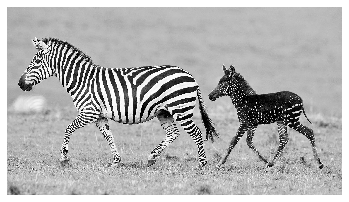

<Figure size 432x288 with 0 Axes>

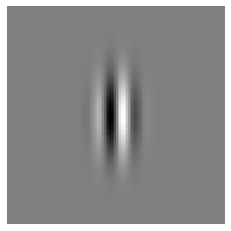

<Figure size 432x288 with 0 Axes>

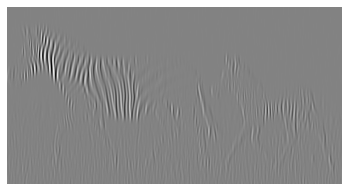

In [182]:
from skimage.color import rgb2gray
from scipy.signal import convolve2d
plt.figure(); myimshow(zebra)
sinGabor = sinFilterBank[8] 
plt.figure(); myimshow(sinGabor)
%time res = convolve2d(zebra, sinGabor, mode='valid') 
plt.figure(); myimshow(res); 

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

In [67]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray, gray2rgb
import skimage

plt.rcParams['figure.figsize'] = (12, 8)

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.5.1


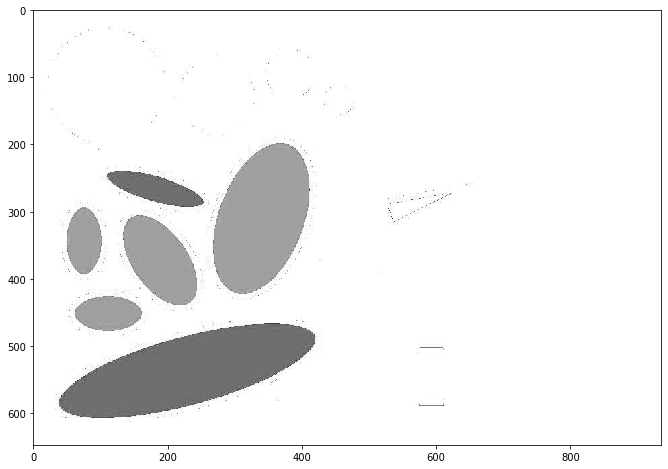

In [68]:
colored = np.array(imageio.imread('ovali.jpg'))

coin = rgb2gray(colored)

plt.imshow(coin);

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

In [69]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray, gray2rgb
import skimage

plt.rcParams['figure.figsize'] = (12, 8)

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.5.1


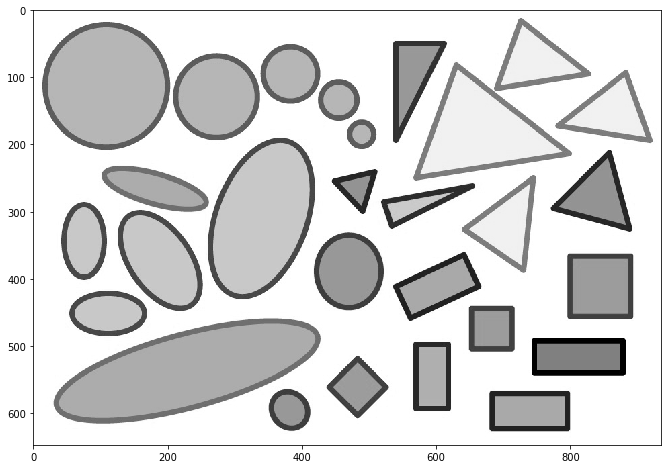

In [70]:
colored = np.array(imageio.imread('forme.jpg'))

coin = rgb2gray(colored)

plt.imshow(coin, cmap='gray');

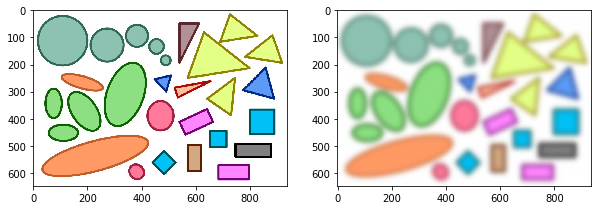

In [74]:
# gaussian filter
import skdemo
from skimage import filters
image = colored

gaussian_result = filters.gaussian(image, sigma=10, multichannel=True) # multichannel = true filtro a tutti i canali

skdemo.imshow_all(image, gaussian_result)

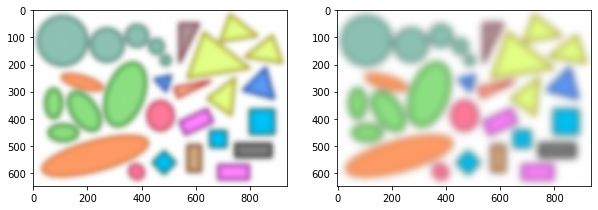

In [75]:
image = gaussian_result

gaussian_result = filters.gaussian(image, sigma=10, multichannel=True) # multichannel = true filtro a tutti i canali

skdemo.imshow_all(image, gaussian_result)

se applichiamo due volte il filtro gaussiano l'immagine rappresente il doppio delle volte più sfuocata.

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough segnandoli con una X

![](forme.jpg)

In [167]:
import os
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray, gray2rgb
import skimage

plt.rcParams['figure.figsize'] = (12, 8)

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.5.1


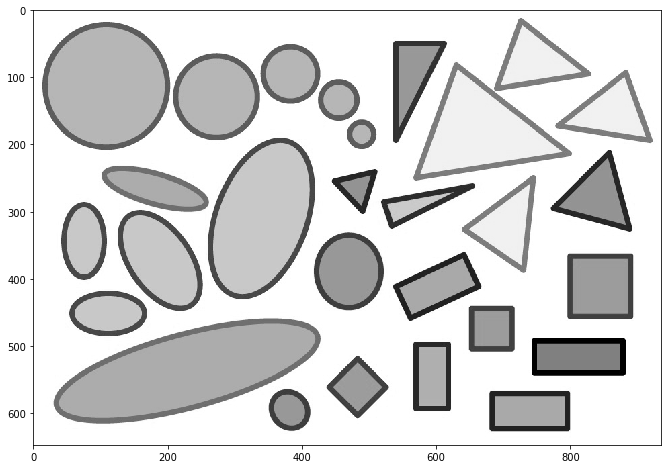

In [168]:
colored = np.array(imageio.imread('forme.jpg'))

coin = rgb2gray(colored)

plt.imshow(coin, cmap='gray');

In [169]:
img = skimage.img_as_ubyte(coin)
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=12, param1=50, param2=70, minRadius=15, maxRadius=90)
circles = np.uint16(np.around(circles_float)) #convertire in coordinate x,y
print(circles.shape)

(1, 8, 3)


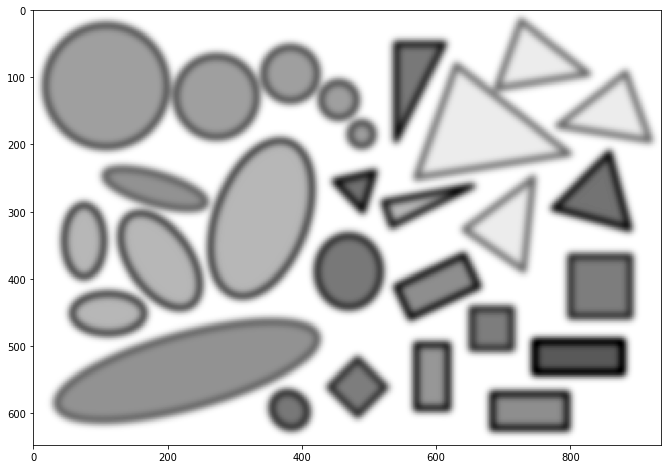

In [170]:
coin_blur = cv2.GaussianBlur(coin, (31, 31), 5) #soluzione sigma=5 , 31x31 filtri

plt.imshow(coin_blur, cmap='gray');

In [171]:
circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()] #ordiniamo sulla prima coordinata
print(circles)
print(circles.shape)

[[108 114  87]
 [274 128  65]
 [382  96  44]
 [384 594  33]
 [454 134  23]
 [470 382  50]
 [470 398  41]
 [488 184  22]]
(8, 3)


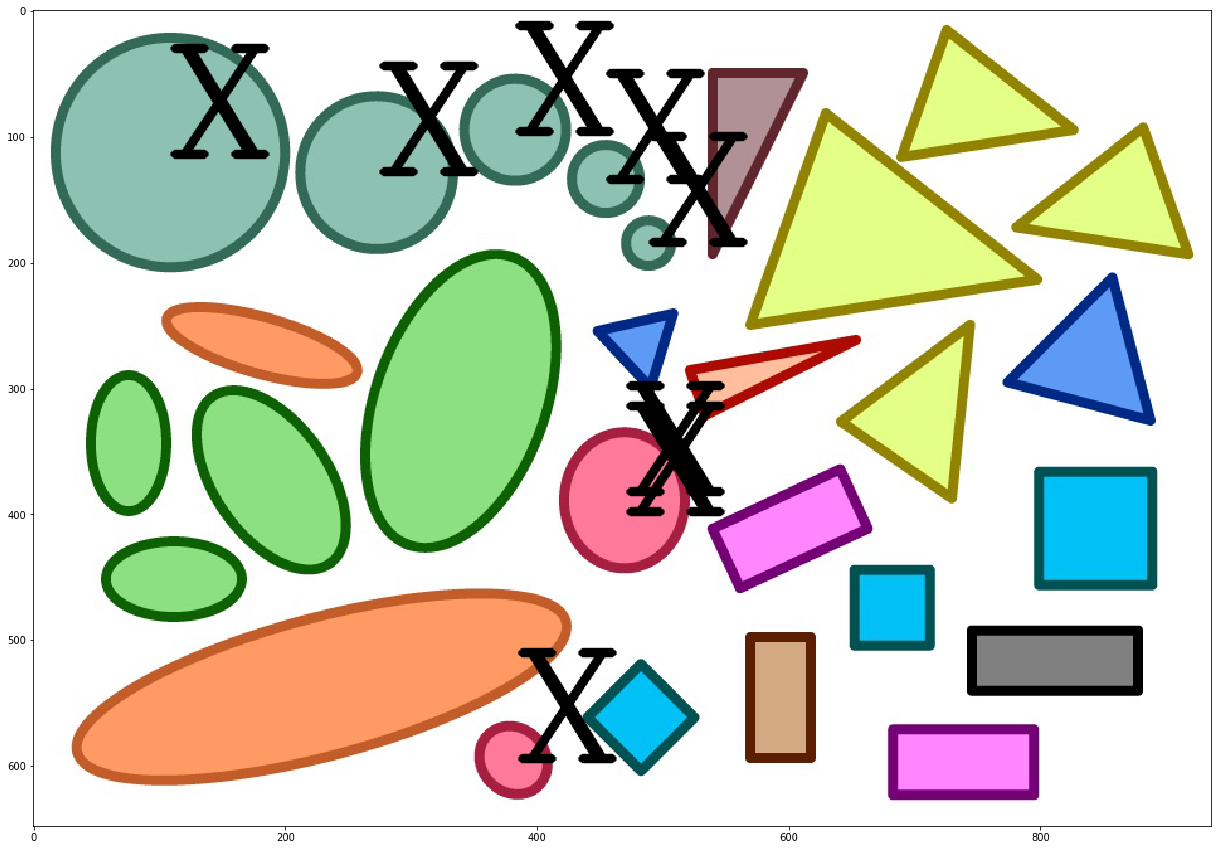

In [172]:
#disegnamo i cerchi trovati
img_coin = np.copy(colored)


font = cv2.FONT_HERSHEY_COMPLEX
for i in range(circles.shape[0]):
    c = (circles[i, 0], circles[i, 1])
    r = circles[i, 2]
    cv2.putText(img_coin, 'X',c, font, 4, (0,0,0), 5, cv2.LINE_AA)
 
    
plt.rcParams["figure.figsize"] = (25,15)    
plt.imshow(img_coin);

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 120° in senso orario in (25, 5) e una traslazione di 50 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

OpenCV-Python Version 4.5.1


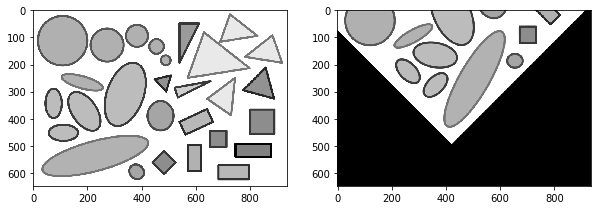

In [4]:
import os
import numpy as np
import skdemo
from skimage import filters
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.transform import SimilarityTransform
from skimage import transform
print("OpenCV-Python Version %s" % cv2.__version__)
# in questa folder sono memorizzati alcuni file a supporto (path relativo al notebook corrente)
IMGSRC = ''
def myResourcePath(fname):
    filename = os.path.join(IMGSRC, fname)
    if not os.path.exists(filename):
        raise RuntimeError(f'file not found {filename}')
    return filename
img = cv2.imread(myResourcePath('forme.jpg'), cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape
M = cv2.getRotationMatrix2D((5,5),45,1) # params: center, angle, scale
dst1 = cv2.warpAffine(img,M,(cols,rows))
tform = SimilarityTransform(translation=(50, 0), rotation=np.deg2rad(45))
warped = transform.warp(img, tform)
skdemo.imshow_all(img, warped)